
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-05-26<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

/bin/sh: nvidia-smi: command not found


**Connect and authorize google drive with google colab:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

ModuleNotFoundError: No module named 'google.colab'

**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [3]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/
!ls

[Errno 2] No such file or directory: 'gdrive/My Drive/TensorFlow-2.x-YOLOv3/'
/Users/gandalf/Projects/osmo/ML/TensorFlow-2.x-YOLOv3
IMAGES                      mnist
README.md                   model_data
YOLOv3_colab_training.ipynb requirements.txt
checkpoints                 tools
detect_mnist.py             train.py
detection_custom.py         yolov3
detection_demo.py


**Install all required libraries for our project:**

In [2]:
!pip install -r ./requirements.txt

You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


**Download yolov3.weights if you don't have it:**

In [5]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2020-06-24 12:09:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights’

yolov3.weights        0%[                    ] 711.70K  67.2KB/s    eta 69m 22s^C


**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.2.0
'/device:GPU:0'
```

In [2]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.2.0


''

**Test by loading trained model:**

In [20]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov3 import Create_Yolov3
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

#input_size = YOLO_INPUT_SIZE
#Darknet_weights = YOLO_DARKNET_WEIGHTS

#yolo = Create_Yolov3(input_size=input_size)
#load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

(10647, 85)


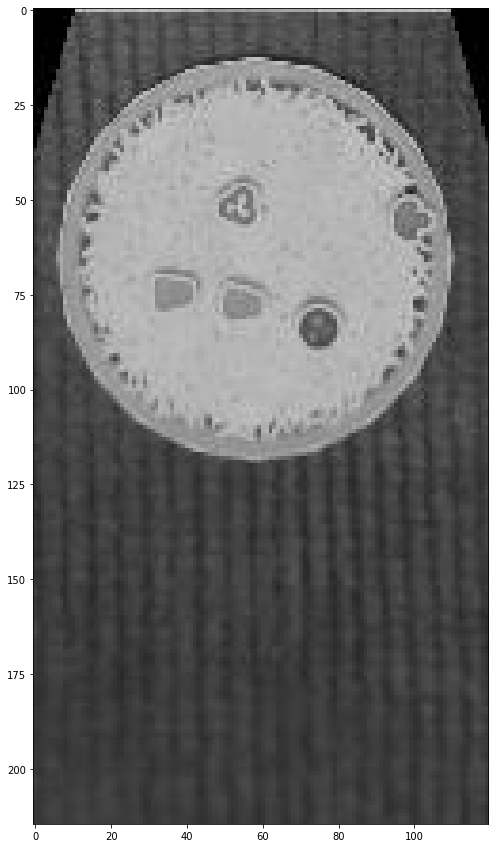

In [11]:
image_path   = "/Users/gandalf/Projects/osmo/ML/final_tensor/model_data/train_data/example3.jpg"

image,pred = detect_image(yolo, image_path, '', input_size=input_size, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
print(pred.shape)
plt.imshow(image)

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [0]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/1.jpg 650,576,959,749,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/2.jpg 215,190,409,294,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/3.jpg 845,429,932,488,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/4.jpg 71,113,397,220,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/6.jpg 784,493,944,593,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/7.jpg 275,215,463,262,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/8.jpg 323,508,500,609,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/9.jpg 140,177,238,200,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/10.jpg 154,126,315,174,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=754.jpg 506,

**Start training custom model:**

In [5]:
from train import *
tf.keras.backend.clear_session()
main()

KeyboardInterrupt: 

**Create Yolo v3 custom model and load custom trained weights**

In [21]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
print(yolo)
yolo.load_weights("/Users/gandalf/Projects/osmo/ML/final_tensor/checkpoints/yolov3_pizza_co_val_loss_1295.35") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

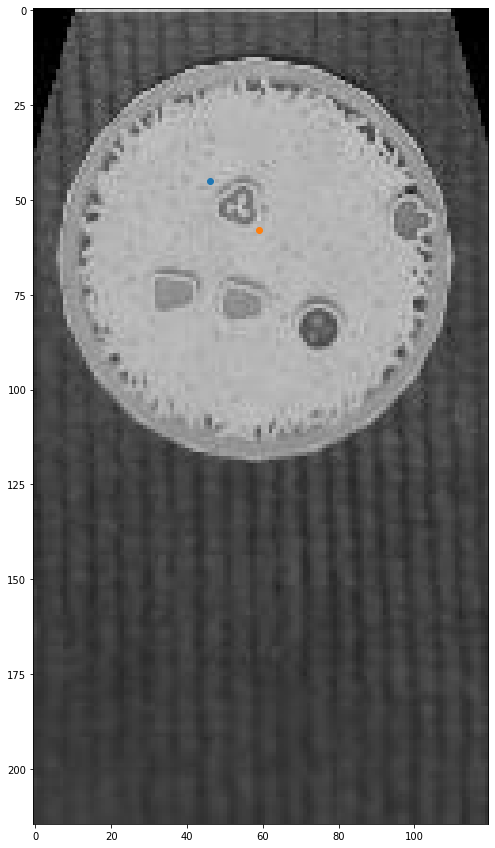

In [41]:
image_path   = "/Users/gandalf/Projects/osmo/ML/final_tensor/model_data/train_data/example3.jpg"
image,pred = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, score_threshold = 0.3, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(30,15))
plt.imshow(image)
plt.scatter(46,45)
plt.scatter(59,58)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**